# Aula 3.3 - Correlação - Desafio

Com dados *simulados** de **# vendas de máscaras** vs. **# casos confirmados de Covid** entre outras características (nº de pessoas negativadas para Covid; # mortes por Covid; valores de frete para vendas das máscaras e valor (R$) gasto na campnha de marketing até aquela data), responda as perguntas a seguir.  
<br /> 

**Os dados foram simulados para servirem o próposito dos exercícios, portanto, não são verossímeis (não são reais) fazendo com que os valores negativos que constam na base tenha sua interpretação ignorada. Ou seja, não verifique a coerência dos valores numéricos de cada linha e variável do banco de dados.*

In [ ]:
## Leitura do banco de dados

#Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
import datetime
from pylab import rcParams

df = pd.read_excel("/Lucas Souza - [Case]Covid_Vendas.xlsx")


df.head()



,Data,Vendas_mascaras,Confirmados_covid,Negativados_covid,Mortes_covid,Frete_vendas_mascaras,MKT_R$
0,2022-01-01,-9720.509765,-4987.382170,-5874.243660,1,-0.160886,9.448831e+07
1,2022-01-02,-50939.315202,119176.535463,-33368.423688,1,-0.756737,2.594814e+09
2,2022-01-03,-44858.430524,5488.834610,13992.071978,1,0.581338,2.012279e+09
3,2022-01-04,137323.877129,59640.323314,98578.919151,1,0.549515,1.885785e+10
4,2022-01-05,-44469.185816,19380.453709,30999.065352,1,-0.763076,1.977508e+09


In [ ]:
concfi = (df["Vendas_mascaras"]>=0)
concfi2 = (df["Confirmados_covid"]>=0)


df_aux = df.loc[(concfi & concfi2), ["Data","Vendas_mascaras", "Confirmados_covid"]]
df_aux

df_aux['Ano'] = df['Data'].dt.strftime('%Y')
df_aux.head()

df_aux.dtypes

Data                 datetime64[ns]
Vendas_mascaras             float64
Confirmados_covid           float64
Ano                          object
dtype: object

#### **1)** Como está o relacionamento entre as variáveis *Vendas* e *Confirmados*? 

In [ ]:
## Código para resposta do ex 

print(df_aux.corr(method='pearson'))
print("\n\n")
print(df_aux.corr(method='spearman'))

                   Vendas_mascaras  Confirmados_covid
Vendas_mascaras           1.000000           0.274875
Confirmados_covid         0.274875           1.000000



                   Vendas_mascaras  Confirmados_covid
Vendas_mascaras            1.00000            0.31279
Confirmados_covid          0.31279            1.00000


É possível concluir que há baixa correlação entre as variáveis de Casos confirmados e compra de mascáras




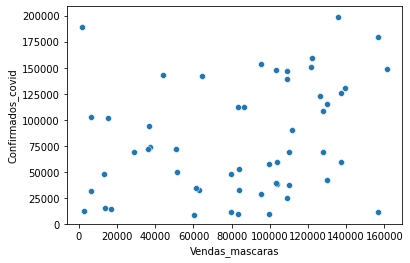

In [ ]:
sns.scatterplot(data=df_aux, x="Vendas_mascaras", y="Confirmados_covid",
                #hue= 'region',
                #style = 'sex',
                #size = 'married'
                );

print("É possível concluir que há baixa correlação entre as variáveis de Casos confirmados e compra de mascáras\n\n")



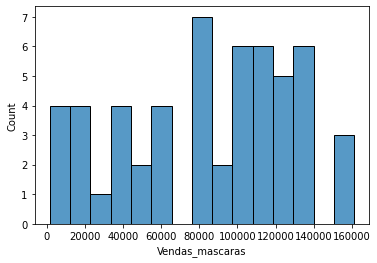

In [ ]:
sns.histplot(data=df_aux, 
             x="Vendas_mascaras", 
             #y ='income'
             #binwidth=1000, 
             bins = 15,
             #kde = True,
             #multiple="stack",
             #element="step"
             legend = True,
             ); 

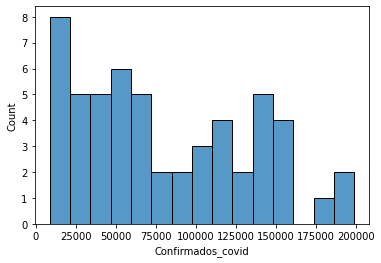

In [ ]:
sns.histplot(data=df_aux, 
             x="Confirmados_covid", 
             #y ='income'
             #binwidth=1000, 
             bins = 15,
             #kde = True,
             #multiple="stack",
             #element="step"
             legend = True,
   ); 

##### **a)** Quando olhamos o relacionamento destas variáveis apenas para o ano de 2020 (início da pandemia) o que notamos? E apenas para o ano de 2022? 
**b)** O que podemos concluir?  

In [ ]:
## Código para resposta do ex 1_a) e 1_b) 

df_2022 = df_aux.loc[df_aux["Ano"]=="2022"]
df_2020 = df_aux.loc[df_aux["Ano"]=="2020"]



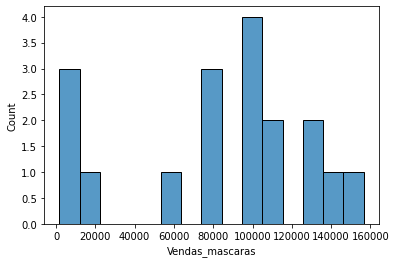

In [ ]:
sns.histplot(data=df_2022, 
             x="Vendas_mascaras", 
             #y ='income'
             #binwidth=1000, 
             bins = 15,
             #kde = True,
             #multiple="stack",
             #element="step"
             legend = True,
   ); 

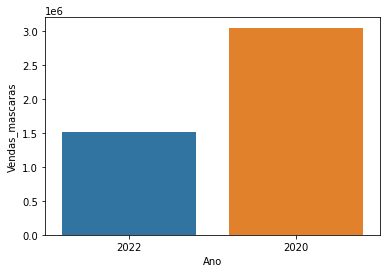

In [ ]:
df_aux
sns.barplot(
    x="Ano",
    y="Vendas_mascaras",
    estimator = sum,
    data = df_aux,
    ci = False
)

                   Vendas_mascaras  Confirmados_covid
Vendas_mascaras           1.000000           0.491738
Confirmados_covid         0.491738           1.000000


É possível concluir que para o ano de 2020 há maior correlação entre as variáveis de Casos confirmados e compra de mascáras




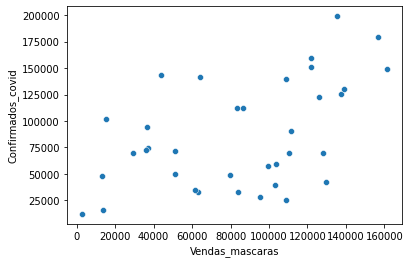

In [ ]:
#2020

print(df_2020.corr(method='pearson'))
print("\n")

sns.scatterplot(data=df_2020, x="Vendas_mascaras", y="Confirmados_covid",
                #hue= 'region',
                #style = 'sex',
                #size = 'married'
                );

print("É possível concluir que para o ano de 2020 há maior correlação entre as variáveis de Casos confirmados e compra de mascáras\n\n")

                   Vendas_mascaras  Confirmados_covid
Vendas_mascaras            1.00000           -0.06118
Confirmados_covid         -0.06118            1.00000


É possível concluir que para o ano de 2022 há baixa/quase nenhuma correlação entre as variáveis de Casos confirmados e compra de mascáras




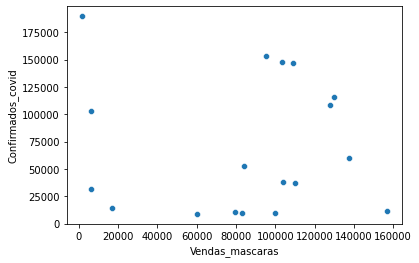

In [ ]:
#2022

print(df_2022.corr(method='pearson'))
print("\n")

sns.scatterplot(data=df_2022, x="Vendas_mascaras", y="Confirmados_covid",
                #hue= 'region',
                #style = 'sex',
                #size = 'married'
                );

print("É possível concluir que para o ano de 2022 há baixa/quase nenhuma correlação entre as variáveis de Casos confirmados e compra de mascáras\n\n")

#### **2)** Qual variável provavelmente pode possuir um poder maior de influência na variável *Vendas*? Por quê? Explique e demonstre seu raciocínio.

In [ ]:
## Código para resposta do ex 2

##Empiricamente podemos supor que as vendas de máscaras são influênciadas pelo investimento em MKT.
##Provando hipótese: 


concfi = (df["Vendas_mascaras"]>=0)
concfi2 = (df["MKT_R$"]>=0)

#É possível concluir que existe uma alta correlação entre as duas variáveis 

df_aux2 = df.loc[(concfi & concfi2), ["Data","Vendas_mascaras", "MKT_R$"]]
df_aux2

print(df_aux2.corr(method="pearson"))


                 Vendas_mascaras    MKT_R$
Vendas_mascaras         1.000000  0.965035
MKT_R$                  0.965035  1.000000


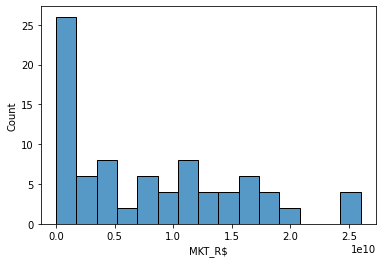

In [ ]:
sns.histplot(data=df_aux2, 
             x="MKT_R$", 
             #y ='income'
             #binwidth=1000, 
             bins = 15,
             #kde = True,
             #multiple="stack",
             #element="step"
             legend = True,
   ); 

#### **3)** Em relação à variável *Vendas* e à variável *MKT*, notamos algo diferente? Como é o relacionamento dessas variáveis?

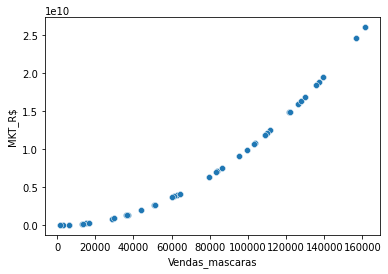

In [ ]:
## Código para resposta do ex 3

#Scatterplot mostando o comportamento entre as variáveis

sns.scatterplot(
      x = "Vendas_mascaras",
      y = "MKT_R$",
      data = df_aux2
)

#Entre as variáveis é possível ver um comportamento exponencial

In [ ]:
df_aux


df_aux["Ano"].replace("2020", "Antes da Vacina", inplace= True)
df_aux["Ano"].replace("2022", "Depois da Vacina", inplace= True)

df_sVacina = df_aux.loc[df_aux["Ano"] == "Antes da Vacina"]
df_Vacina = df_aux.loc[df_aux["Ano"] == "Depois da Vacina"]

max = df_aux["Vendas_mascaras"].max()
min = df_aux["Vendas_mascaras"].min()

faixas = 5

amplitude = round((max - min)/faixas,2)

amplitude

31904.22

In [ ]:
valores_Fim = []
faixa = min
while(faixa < max):
  minaux = faixa
  faixa = faixa + amplitude
  maxaux = faixa
  concfi = (df_sVacina["Vendas_mascaras"]>=minaux)
  concfi2 = (df_sVacina["Vendas_mascaras"]<= maxaux)

  aux = df_sVacina.loc[(concfi & concfi2),"Vendas_mascaras"].count()
  valores_Fim.append(aux)

#valores_Fim

valores_Fim2 = []
faixa = min
while(faixa < max):
  minaux = faixa
  faixa = faixa + amplitude
  maxaux = faixa
  concfi = (df_Vacina["Vendas_mascaras"]>=minaux)
  concfi2 = (df_Vacina["Vendas_mascaras"]<= maxaux)

  aux = df_Vacina.loc[(concfi & concfi2),"Vendas_mascaras"].count()
  valores_Fim2.append(aux)

dfFinal =[[valores_Fim],[valores_Fim2]]

dfFinal



[[[5, 9, 5, 11, 6]], [[4, 1, 4, 6, 3]]]

In [ ]:
pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from scipy.stats import chi2_contingency

score = dfFinal
stat, p, dof, expected = chi2_contingency(score) #Infos teóricas sobre cada parâmetro (stat, p...) no primeiro link "Teo sobre Qui-Qua"

In [ ]:
chi2_contingency(score)

(3.4794117647058824,
 0.4810157284544434,
 4,
 array([[[ 6.        ,  6.66666667,  6.        , 11.33333333,
           6.        ]],
 
        [[ 3.        ,  3.33333333,  3.        ,  5.66666667,
           3.        ]]]))

In [ ]:
alpha = 0.05
 
print("O valor resultante do teste é: " + str(p))
if p <= alpha:
    print('Dependente (rejeita H0).')
else:
    print('Independente (não rejeita H0).')

O valor resultante do teste é: 0.4810157284544434
Independente (não rejeita H0).
